# Importing all the Necessary libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

# Read the dataset

In [3]:
Banks=pd.read_csv('bank.csv')

Banks.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
Banks.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [2]:
Banks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


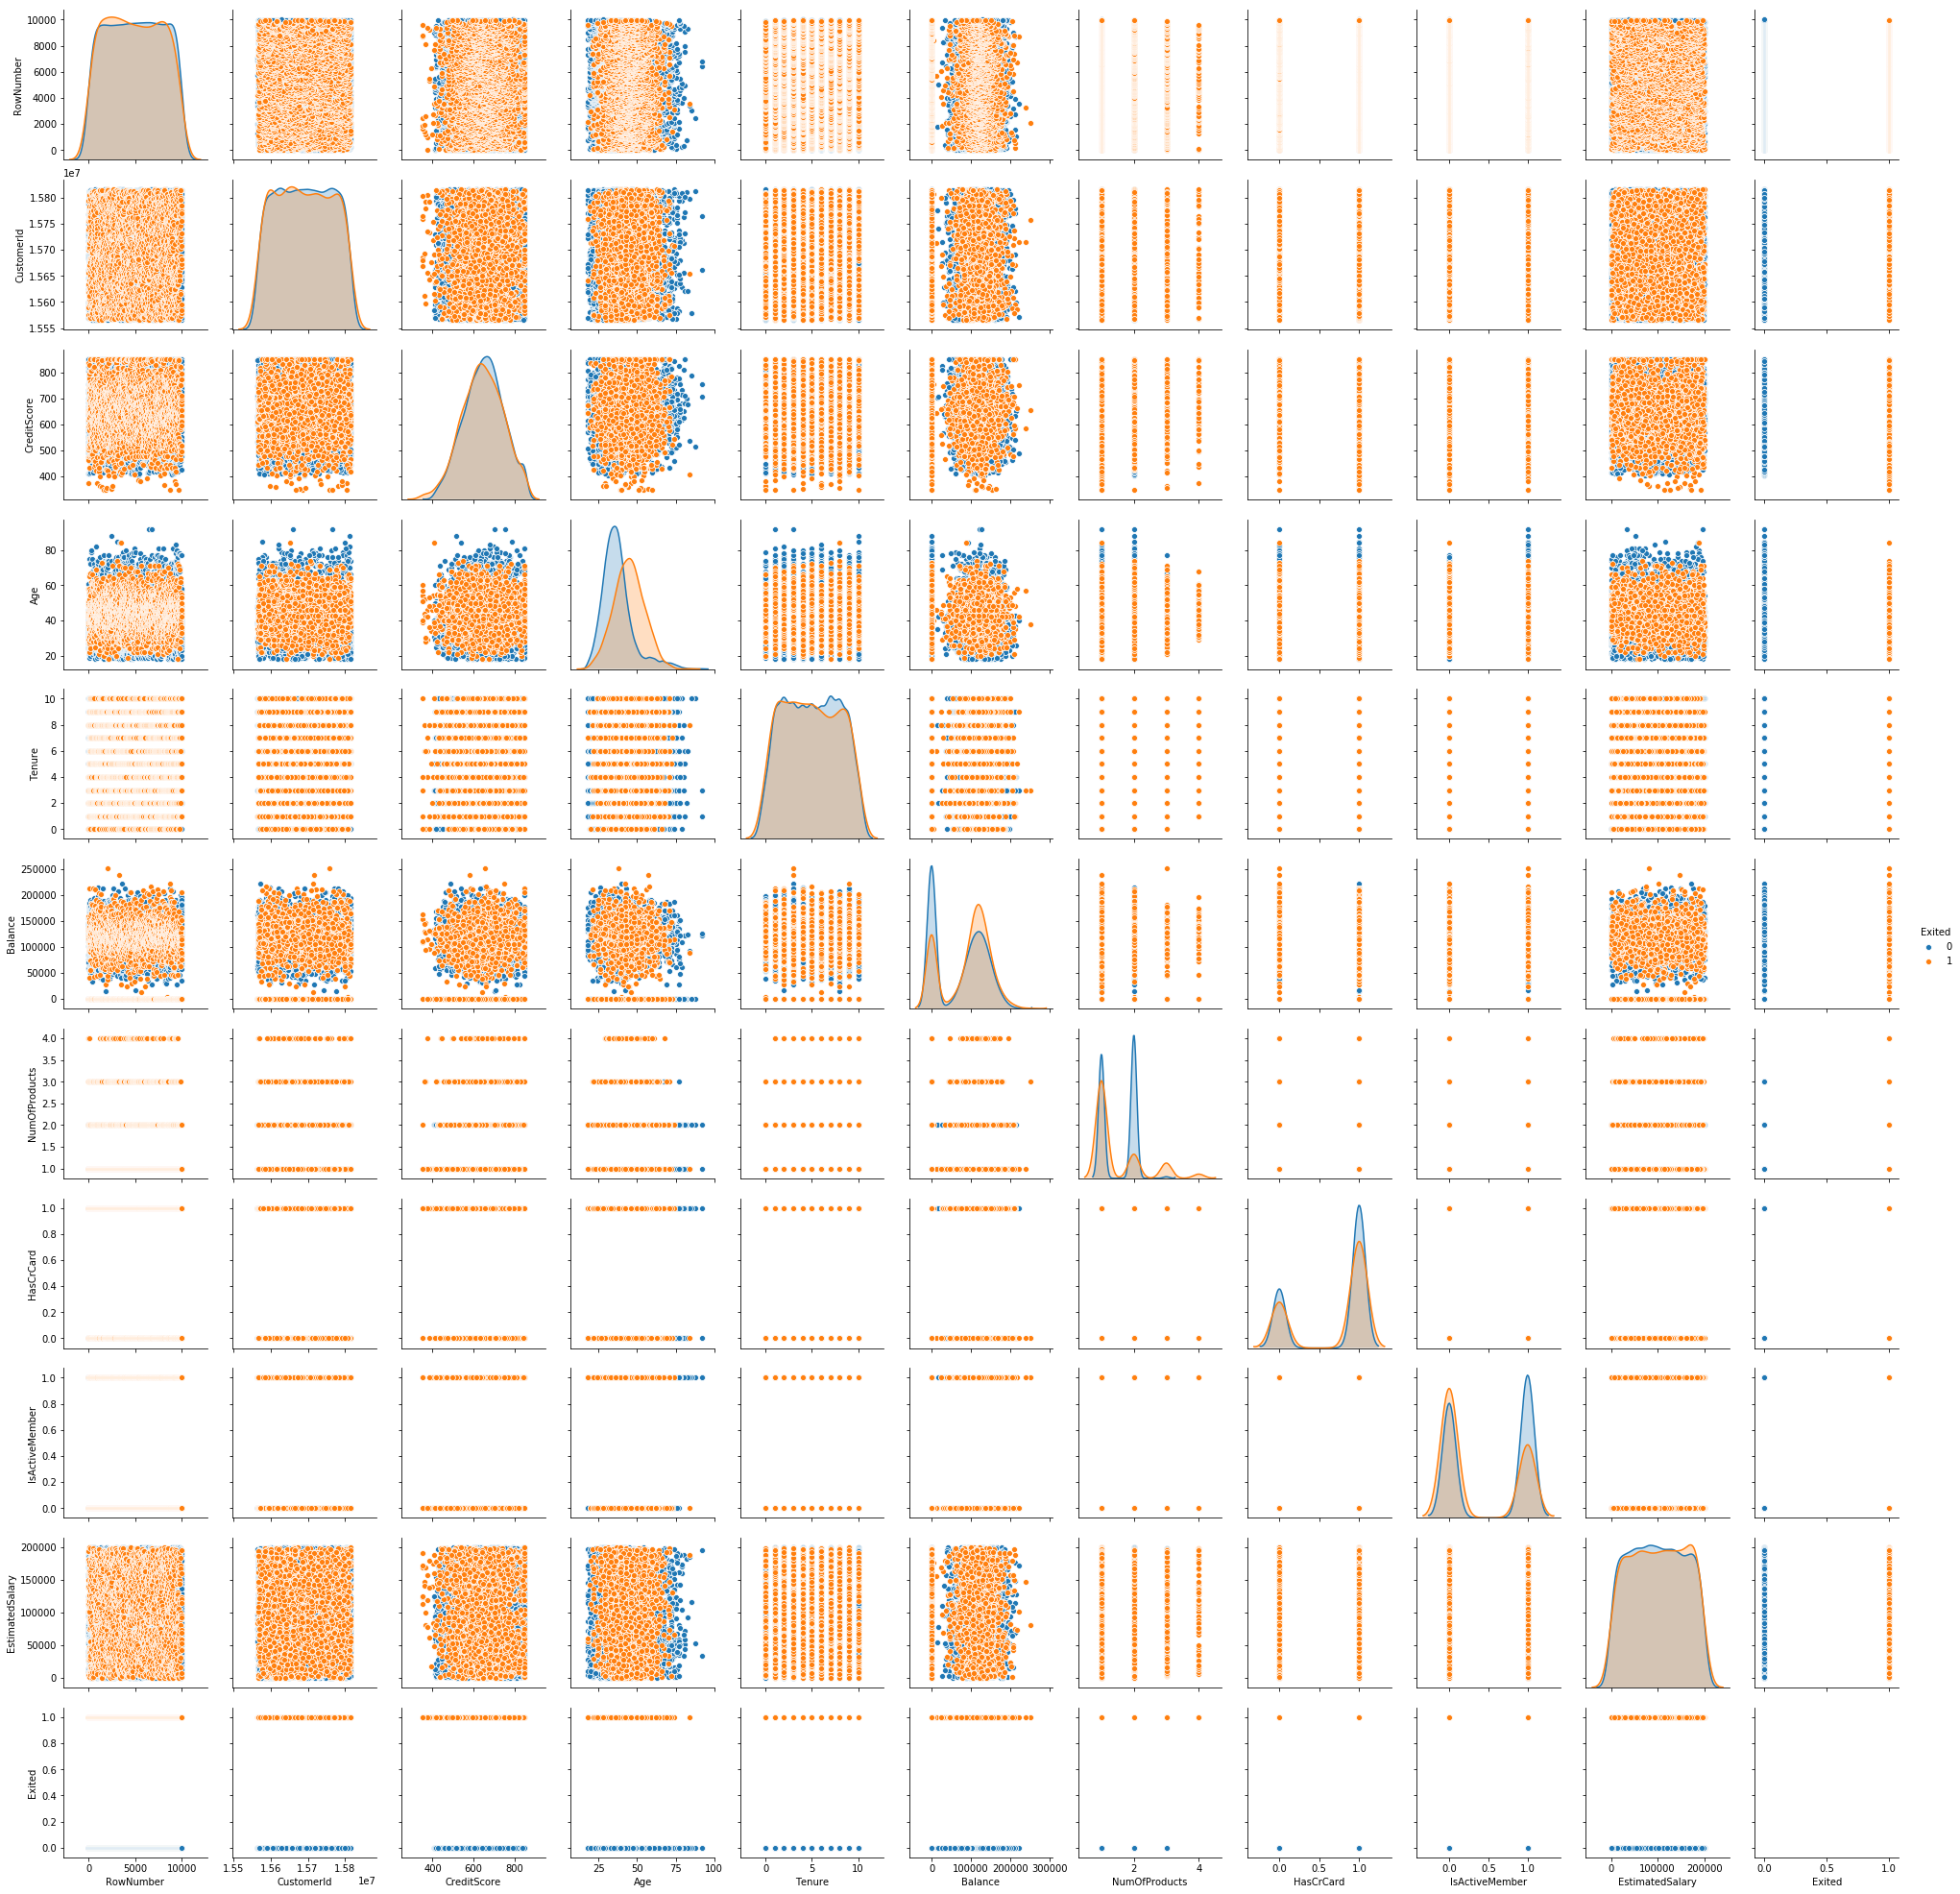

In [26]:
sns.pairplot(Banks,hue="Exited",diag_kind="kde")

In [4]:
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
# Removing columns unique to all records (no variance columns)
df=Banks.drop(['RowNumber','CustomerId','Exited'],axis=1)
X=pd.DataFrame(index=df.index)
Y=Banks[['Exited']]

for column in df:
    LE = LabelEncoder() 
    X[column] = zscore(LE.fit_transform(df[column]))

from scipy.stats.stats import pearsonr
Drop_out=[]
#Correlation Coffecient
for Column in X:
    corr, p_value = pearsonr(X[Column], Y['Exited'])
    print(Column,corr)
    if corr < 0: Drop_out.append(Column)
 
X=X.drop(Drop_out,axis=1)

Surname -0.010821913464743975
CreditScore -0.026002019075496974
Geography 0.03594295460653704
Gender -0.1065124876734746
Age 0.28553723020107
Tenure -0.014000612253444596
Balance 0.09726417816527004
NumOfProducts -0.0478198649494406
HasCrCard -0.0071377656030390466
IsActiveMember -0.1561282781889051
EstimatedSalary 0.01208080249611567


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.30, random_state=42,stratify=Y)

In [6]:
import tensorflow as tf
import keras 
from keras.models import Sequential 
from keras.layers import Dense, Dropout 
from keras.optimizers import SGD 
from keras import utils 

Using TensorFlow backend.


In [7]:
y_train = tf.keras.utils.to_categorical(y_train,2)
y_test = tf.keras.utils.to_categorical(y_test,2)
X.shape

(10000, 4)

In [8]:
X_train=X_train.astype('float32')
y_train=y_train.astype('float32')


In [9]:
# build a sequential model 

model = Sequential() # the first layer has to specify the dimensions of the input vector 
model.add( Dense( units = 100, activation ='sigmoid', input_dim=4)) # add dropout layer for preventing overfitting 
model.add( Dropout( 0.1)) 
model.add( Dense( units = 100, activation ='sigmoid')) 
model.add( Dropout( 0.1)) # output layer can only have the neurons equal to the number of outputs 
model.add( Dense( units = 2, activation ='softmax')) # print the summary of our model 
model.summary() 

# compile the model 
model.compile( loss ='categorical_crossentropy', optimizer = SGD(), metrics =['accuracy']) 

# train the model 
model.fit( X_train, y_train, batch_size = 100, epochs = 10) 

# evaluate the model and print the accuracy score 

scores = model.evaluate( X_test, y_test) 

print('\n loss:', scores[ 0]) 

print('\n accuracy:', scores[ 1])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               500       
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 202       
Total params: 10,802
Trainable params: 10,802
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
7000/7000 [==============================] - 1s 200us/step - loss: 0.5352 - acc: 0.7743
Epoch 2/10
7000/7000 [=================

In [12]:
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
# Function to create model, required for KerasClassifier
def create_model(optimizer='adam'):
    model = Sequential() 
    model.add( Dense( units = 10, activation ='sigmoid', input_dim=4)) 
    model.add( Dropout( 0.1)) 
    model.add( Dense( units = 10, activation ='sigmoid')) 
    model.add( Dropout( 0.1)) 
    model.add( Dense( units = 2, activation ='softmax'))
    
    # compile the model 
    model.compile( loss ='categorical_crossentropy',optimizer=optimizer, metrics =['accuracy']) 
    return model

model = KerasClassifier(build_fn=create_model, verbose=0)

# define the grid search parameters
optimizer = ['SGD', 'Adam', 'Nadam']
batch_size =[ 60, 80, 100]
epochs = [10, 50, 100]

param_grid = dict(optimizer=optimizer,batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.796857 using {'batch_size': 80, 'epochs': 100, 'optimizer': 'Nadam'}
0.796286 (0.018567) with: {'batch_size': 60, 'epochs': 10, 'optimizer': 'SGD'}
0.796286 (0.018567) with: {'batch_size': 60, 'epochs': 10, 'optimizer': 'Adam'}
0.796286 (0.018567) with: {'batch_size': 60, 'epochs': 10, 'optimizer': 'Nadam'}
0.796286 (0.018567) with: {'batch_size': 60, 'epochs': 50, 'optimizer': 'SGD'}
0.796286 (0.018567) with: {'batch_size': 60, 'epochs': 50, 'optimizer': 'Adam'}
0.796286 (0.018567) with: {'batch_size': 60, 'epochs': 50, 'optimizer': 'Nadam'}
0.796286 (0.018567) with: {'batch_size': 60, 'epochs': 100, 'optimizer': 'SGD'}
0.796000 (0.018773) with: {'batch_size': 60, 'epochs': 100, 'optimizer': 'Adam'}
0.796286 (0.018567) with: {'batch_size': 60, 'epochs': 100, 'optimizer': 'Nadam'}
0.796286 (0.018567) with: {'batch_size': 80, 'epochs': 10, 'optimizer': 'SGD'}
0.796286 (0.018567) with: {'batch_size': 80, 'epochs': 10, 'optimizer': 'Adam'}
0.796000 (0.018163) with: {'batch_size': 

In [19]:
# build a sequential model 

model = Sequential() # the first layer has to specify the dimensions of the input vector 
model.add( Dense( units = 100, activation ='sigmoid', input_dim=4)) # add dropout layer for preventing overfitting 
model.add( Dropout( 0.1)) 
model.add( Dense( units = 100, activation ='sigmoid')) 
model.add( Dropout( 0.1)) # output layer can only have the neurons equal to the number of outputs 
model.add( Dense( units = 2, activation ='softmax')) # print the summary of our model 
model.summary() 

# compile the model 
model.compile( loss ='categorical_crossentropy', optimizer = 'Nadam', metrics =['accuracy']) 

# train the model 
model.fit( X_train, y_train, batch_size = 80, epochs = 100) 

# evaluate the model and print the accuracy score 

scores = model.evaluate( X_test, y_test) 

print('\n loss:', scores[ 0]) 

print('\n accuracy:', scores[ 1])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 100)               500       
_________________________________________________________________
dropout_13 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_14 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 2)                 202       
Total params: 10,802
Trainable params: 10,802
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
7000/7000 [==============================] - 1s 108us/step - loss: 0.5051 - acc: 0.7877
Epoch 2/100
7000/7000 [===============

In [44]:
from sklearn.metrics import confusion_matrix,classification_report

y_pred = (model.predict_proba(X_test) >= 0.5).astype(bool)

# Confusion Matrix
print('Confusion Matrix: \n',confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1)))
tn, fp, fn, tp = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1)).ravel()
print('\n True negative:',tn,"\n False Positive:",fp,'\n False Negative:',fn,'\n True Positive:', tp)

#precision and Recall metrics
print('\n',classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

Confusion Matrix: 
 [[2306   83]
 [ 461  150]]

 True negative: 2306 
 False Positive: 83 
 False Negative: 461 
 True Positive: 150

               precision    recall  f1-score   support

           0       0.83      0.97      0.89      2389
           1       0.64      0.25      0.36       611

   micro avg       0.82      0.82      0.82      3000
   macro avg       0.74      0.61      0.62      3000
weighted avg       0.79      0.82      0.78      3000



Inference: The dataset has a class imbalance problem, hence Prediction accuracy for Class 1 is low.